In [29]:
import pandas as pd 
import numpy as np 

In [30]:
df = pd.read_csv("StudentPerformance.csv")

In [31]:
df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3551,11,65,Medium,Low,Yes,5,62,Medium,Yes,2,Medium,High,Public,Neutral,2,No,College,Far,Female,60
2685,22,81,High,Medium,No,7,87,Low,Yes,0,Low,Medium,Public,Neutral,2,No,High School,Near,Female,67
2195,16,73,Medium,Medium,Yes,4,61,Low,Yes,4,Low,High,Private,Neutral,5,No,High School,Moderate,Male,64
500,26,71,Medium,Low,No,6,94,Low,Yes,3,Low,Medium,Public,Positive,4,No,Postgraduate,Near,Male,68
5152,23,62,High,High,Yes,7,67,Low,Yes,1,Low,Medium,Public,Negative,4,No,Postgraduate,Moderate,Female,65


## Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [33]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [34]:
df = df.drop(columns=['Distance_from_Home','Previous_Scores','Peer_Influence','Parental_Education_Level','Motivation_Level'])

In [35]:
df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [36]:
df = df[~df['Teacher_Quality'].isnull()]

In [37]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

In [38]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Internet_Access', 'Tutoring_Sessions', 'Family_Income',
       'Teacher_Quality', 'School_Type', 'Physical_Activity',
       'Learning_Disabilities', 'Gender', 'Exam_Score'],
      dtype='object')

In [39]:
for i in df.columns:
    r = df[i].unique()
    print(r)

[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
[ 7  8  6 10  9  5  4]
['Yes' 'No']
[0 2 1 3 4 5 6 7 8]
['Low' 'Medium' 'High']
['Medium' 'High' 'Low']
['Public' 'Private']
[3 4 2 1 5 0 6]
['No' 'Yes']
['Male' 'Female']
[ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  58  94  55  92  82  77 101  88  91
  99  87  57  96  98  95  85  93  56]


In [40]:
# the results does not have any faulty values

In [50]:
df = df.drop(columns='index')

In [53]:
df.reset_index(drop=True, inplace=True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,Yes,0,Low,Medium,Public,3,No,Male,67
1,19,64,Low,Medium,No,8,Yes,2,Medium,Medium,Public,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,Yes,2,Medium,Medium,Public,4,No,Male,74
3,29,89,Low,Medium,Yes,8,Yes,1,Medium,Medium,Public,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,Yes,3,Medium,High,Public,4,No,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,25,69,High,Medium,No,7,Yes,1,High,Medium,Public,2,No,Female,68
6525,23,76,High,Medium,No,8,Yes,3,Low,High,Public,2,No,Female,69
6526,20,90,Medium,Low,Yes,6,Yes,3,Low,Medium,Public,2,No,Female,68
6527,10,86,High,High,Yes,6,Yes,2,Low,Medium,Private,3,No,Female,68


In [55]:
df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
5738,27,64,Medium,Medium,No,5,Yes,1,Low,High,Public,3,No,Female,64
5307,18,93,Low,High,Yes,6,Yes,1,Medium,Medium,Private,3,No,Male,69
5588,19,85,High,High,No,7,Yes,3,Medium,Medium,Public,2,No,Female,71
6302,27,74,Medium,High,No,6,Yes,2,Medium,Medium,Private,4,No,Male,68
3549,18,71,Medium,Medium,Yes,7,Yes,0,Low,Medium,Public,4,No,Female,63


## EDA

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Only select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions',
       'Physical_Activity', 'Exam_Score'],
      dtype='object')

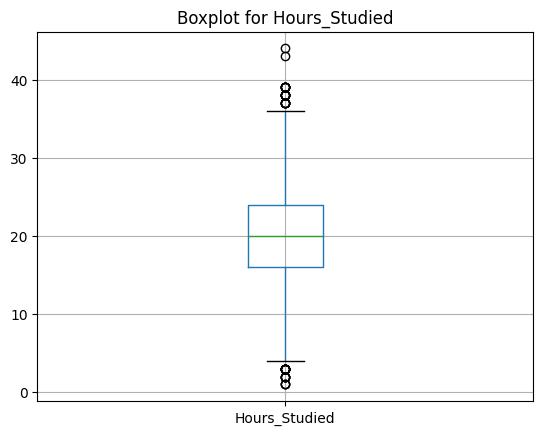

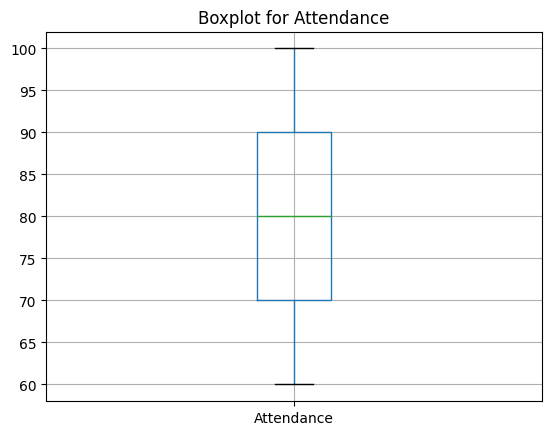

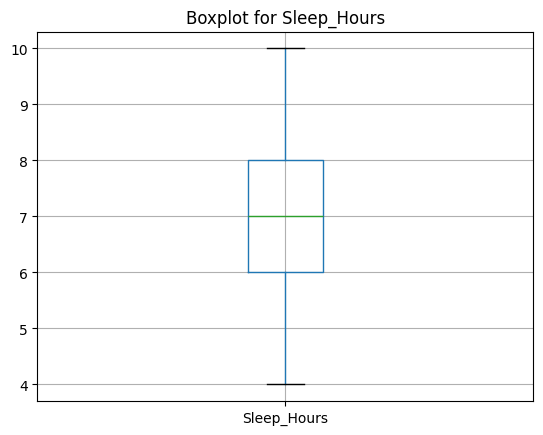

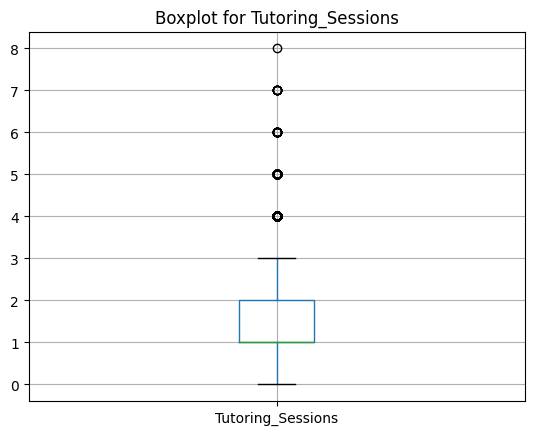

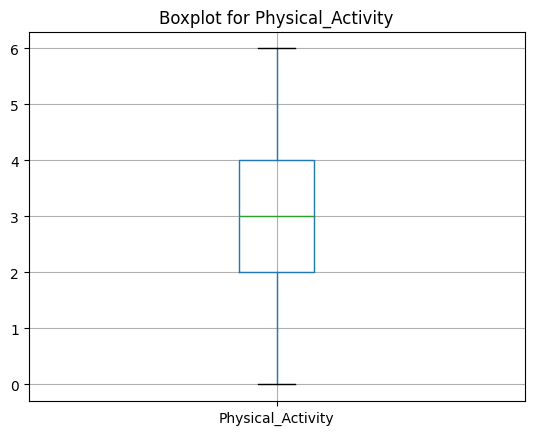

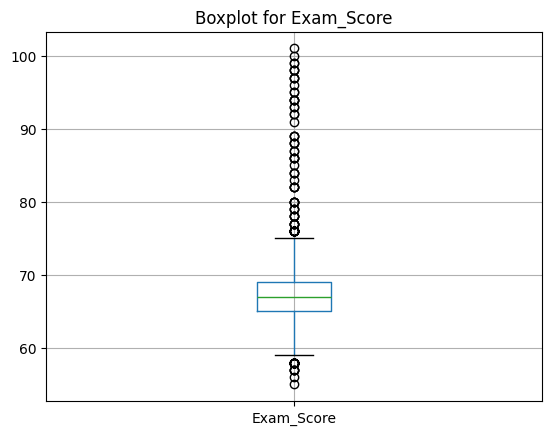

In [62]:
for col in numeric_columns:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot for {col}')

In [ ]:
# Since the outliers are just good and bad performing student and not error . its best to keep them but use regularization
# to keep their impact on skewness minimum

## Model

In [72]:
X = df.drop(columns='Exam_Score')
y = df['Exam_Score']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [78]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,Yes,0,Low,Medium,Public,3,No,Male,67
1,19,64,Low,Medium,No,8,Yes,2,Medium,Medium,Public,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,Yes,2,Medium,Medium,Public,4,No,Male,74
3,29,89,Low,Medium,Yes,8,Yes,1,Medium,Medium,Public,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,Yes,3,Medium,High,Public,4,No,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,25,69,High,Medium,No,7,Yes,1,High,Medium,Public,2,No,Female,68
6525,23,76,High,Medium,No,8,Yes,3,Low,High,Public,2,No,Female,69
6526,20,90,Medium,Low,Yes,6,Yes,3,Low,Medium,Public,2,No,Female,68
6527,10,86,High,High,Yes,6,Yes,2,Low,Medium,Private,3,No,Female,68


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [93]:
ohe = OneHotEncoder()
ohe.fit_transform(X[['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Internet_Access','Family_Income','Teacher_Quality','School_Type','Learning_Disabilities','Gender']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 58761 stored elements and shape (6529, 22)>

In [94]:
ohe.categories_

[array(['High', 'Low', 'Medium'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['Private', 'Public'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [95]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Internet_Access','Family_Income','Teacher_Quality','School_Type','Learning_Disabilities','Gender']),
                                 remainder='passthrough')

In [96]:
rlr = Ridge(alpha=1.0) 

In [97]:
pipe = make_pipeline(column_trans,rlr)

In [98]:
pipe.fit(X_train,y_train)

C:\Users\anas1\anaconda3\envs\ML\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['High', 'Low', 'Medium'], dtype=object),
                                                                            array(['High', 'Low', 'Medium'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['High', 'Low', 'Medium'], dtype=object),
                                                                            array(['High', 'Low', 'Medium'], dtype=object),
                                                                            array(['Private', 'Public'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['Female', 'Male'], dtype=object)]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Learning_Disabilities',
                                                   'Gender'])])),
                ('ridge', Ridge())])

In [99]:
y_pred = pipe.predict(X_test)

In [101]:
r2_score(y_test,y_pred)

0.6458251418979547

In [109]:
best_score = float('-inf')
best_alpha = None
best_random_state = None
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    for j in range(1, 6):
        rlr = Ridge(alpha=j)
        pipe = make_pipeline(column_trans, rlr)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        score = r2_score(y_test, y_pred)  # Calculate R² score
        
        # Check if the current score is the best score
        if score > best_score:
            best_score = score
            best_alpha = j
            best_random_state = i 

In [110]:
print(best_alpha)
print(best_random_state)
print(best_score)

5
997
0.8664602794338739


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=997)
rlr = Ridge(alpha=5)
pipe = make_pipeline(column_trans, rlr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
score = r2_score(y_test, y_pred)

print(score)

0.8664602794338739


In [114]:
df.to_csv("Cleaned_student_performance")

In [115]:
import pickle

In [116]:
pickle.dump(pipe,open('student_performance_predictor_Model.pkl','wb'))

In [117]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,Yes,0,Low,Medium,Public,3,No,Male,67
1,19,64,Low,Medium,No,8,Yes,2,Medium,Medium,Public,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,Yes,2,Medium,Medium,Public,4,No,Male,74
3,29,89,Low,Medium,Yes,8,Yes,1,Medium,Medium,Public,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,Yes,3,Medium,High,Public,4,No,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,25,69,High,Medium,No,7,Yes,1,High,Medium,Public,2,No,Female,68
6525,23,76,High,Medium,No,8,Yes,3,Low,High,Public,2,No,Female,69
6526,20,90,Medium,Low,Yes,6,Yes,3,Low,Medium,Public,2,No,Female,68
6527,10,86,High,High,Yes,6,Yes,2,Low,Medium,Private,3,No,Female,68
